In [38]:
from fastai import *
from fastai.vision import *
from os import listdir
import sys
from PIL import Image
from fastai.widgets import *
from PIL import ImageFile
from fastai.imports import *
from fastai.metrics import error_rate

In [2]:
# Sources
# Image collection procedure and code
# https://github.com/fpingham/google-images-dataset

In [3]:
def image_downloader(x):
    url_path = Path('lesson1/image_url_lists')
    path = Path('lesson1/shoe_brand_images')
    folder = x.split('.')[0]
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(url_path/x, dest,max_workers=20)

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
shoe_brand_image_urls = listdir(os.getcwd()+"/lesson1/image_url_lists")
shoe_brand_image_urls = [ x for x in shoe_brand_image_urls if x is not '.DS_Store' ]

In [18]:
# [image_downloader(item) for item in shoe_brand_image_urls]
# [image_downloader(item) for item in ['aarkcopenhagen.txt','adidas.txt','allbirds.txt','asics.txt']]
# [image_downloader(item) for item in ['balenciaga.txt','brandblack.txt','burberry.txt','clae.txt']]
# [image_downloader(item) for item in ['clae.txt','coach.txt','commonprojects.txt','converse.txt','fendi.txt']]
# [image_downloader(item) for item in ['goldengoose.txt','louisvuitton.txt','nike.txt']]
# [image_downloader(item) for item in ['prada.txt','reebok.txt']
# [image_downloader(item) for item in [ 'saucony.txt']
# [image_downloader(item) for item in ['vans.txt']]
# [image_downloader(item) for item in ['veja.txt','yeezy.txt','yvessaintlaurent.txt']]

[None, None, None]

In [28]:
for x in shoe_brand_image_urls:
    dirname = 'lesson1/shoe_brand_images/' + x.split('.')[0]
    print(dirname)
    cnt=0
    for filename in os.listdir(dirname):
        try:
            img=Image.open(dirname+"/"+filename)
        except OSError:
            print("FILE: ", filename, "is corrupt!")
            cnt+=1
            os.remove(dirname+"/"+filename)
    print("Successfully Completed Operation! Files Courrupted are ", cnt)

lesson1/shoe_brand_images/puma
Successfully Completed Operation! Files Courrupted are  0
lesson1/shoe_brand_images/louisvuitton
Successfully Completed Operation! Files Courrupted are  0
lesson1/shoe_brand_images/gucci
Successfully Completed Operation! Files Courrupted are  0
lesson1/shoe_brand_images/newbalance
Successfully Completed Operation! Files Courrupted are  0
lesson1/shoe_brand_images/airjordan
Successfully Completed Operation! Files Courrupted are  0
lesson1/shoe_brand_images/prada
Successfully Completed Operation! Files Courrupted are  0
lesson1/shoe_brand_images/coach
Successfully Completed Operation! Files Courrupted are  0
lesson1/shoe_brand_images/yeezy
Successfully Completed Operation! Files Courrupted are  0
lesson1/shoe_brand_images/nike
Successfully Completed Operation! Files Courrupted are  0
lesson1/shoe_brand_images/vans
Successfully Completed Operation! Files Courrupted are  0
lesson1/shoe_brand_images/burberry
Successfully Completed Operation! Files Courrupted a

In [16]:
data = ImageDataBunch.from_folder(Path('lesson1/shoe_brand_images'), train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=20).normalize(imagenet_stats)

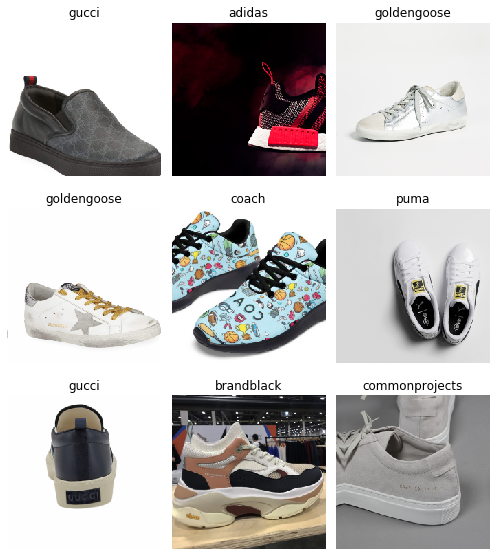

In [17]:
data.show_batch(rows=3, figsize=(7,8),num_workers=0)

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [19]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.260790,2.364104,0.646796,05:07
1,2.459535,2.031013,0.585693,05:09
2,2.081779,1.886927,0.546572,05:12
3,1.883801,1.857511,0.539866,05:10


In [27]:
learn.save('sneaker-brand-model-stage-1')

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

TypeError: _cl_int_plot_top_losses() got an unexpected keyword argument 'figsize'

In [24]:
doc(interp.plot_top_losses)

_cl_int_plot_top_losses [source] [test] _cl_int_plot_top_losses ( k , largest : bool = True , return_table : bool = False ) → Optional [ Figure ] 
 
 × No tests found for _cl_int_plot_top_losses . To contribute a test please refer to this guide and this discussion . Generates a dataframe of 'top_losses' along with their prediction, actual, loss, and probability of the actual class. 
 Show in docs

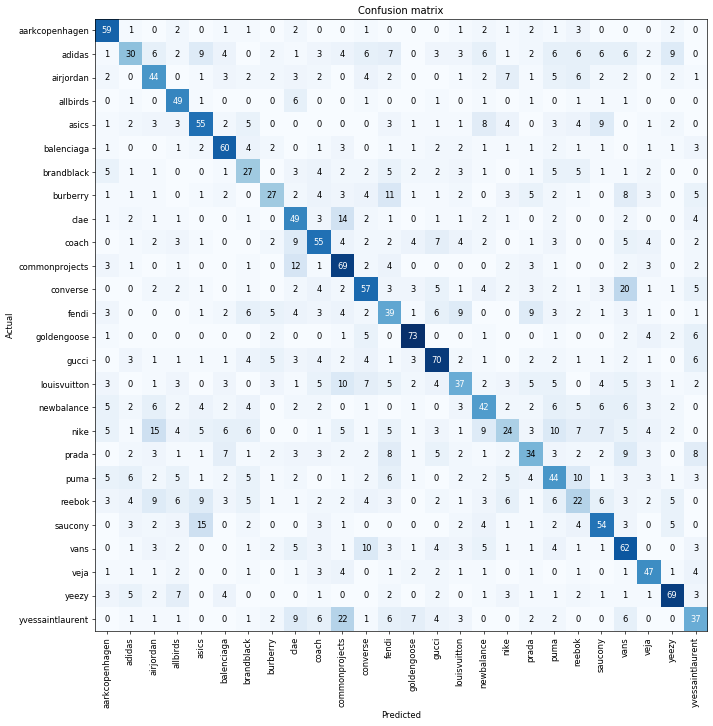

In [25]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [26]:
interp.most_confused(min_val=6)

[('yvessaintlaurent', 'commonprojects', 22),
 ('converse', 'vans', 20),
 ('nike', 'airjordan', 15),
 ('saucony', 'asics', 15),
 ('clae', 'commonprojects', 14),
 ('commonprojects', 'clae', 12),
 ('burberry', 'fendi', 11),
 ('louisvuitton', 'commonprojects', 10),
 ('nike', 'puma', 10),
 ('puma', 'reebok', 10),
 ('vans', 'converse', 10),
 ('adidas', 'asics', 9),
 ('adidas', 'yeezy', 9),
 ('asics', 'saucony', 9),
 ('coach', 'clae', 9),
 ('fendi', 'louisvuitton', 9),
 ('fendi', 'prada', 9),
 ('nike', 'newbalance', 9),
 ('prada', 'vans', 9),
 ('reebok', 'airjordan', 9),
 ('reebok', 'asics', 9),
 ('yvessaintlaurent', 'clae', 9),
 ('asics', 'newbalance', 8),
 ('burberry', 'vans', 8),
 ('prada', 'fendi', 8),
 ('prada', 'yvessaintlaurent', 8),
 ('adidas', 'fendi', 7),
 ('airjordan', 'nike', 7),
 ('coach', 'gucci', 7),
 ('louisvuitton', 'converse', 7),
 ('nike', 'reebok', 7),
 ('nike', 'saucony', 7),
 ('prada', 'balenciaga', 7),
 ('yeezy', 'allbirds', 7),
 ('yvessaintlaurent', 'goldengoose', 7),


In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


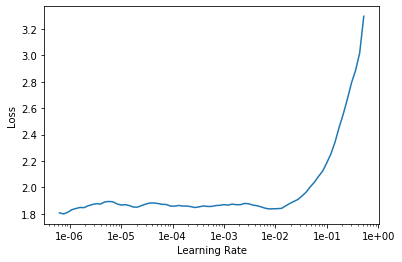

In [29]:
learn.recorder.plot()

In [30]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.274021,1.874505,0.524218,05:20
1,1.508720,1.460187,0.422131,05:11


In [31]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.548979,1.580276,0.448212,05:14
1,1.078604,1.293568,0.374441,05:16


In [32]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.207624,1.391017,0.384128,05:16
1,0.835796,1.208122,0.336811,05:10


In [33]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.934385,1.420523,0.387854,05:10
1,0.630197,1.199416,0.318182,05:13


In [34]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.747329,1.398463,0.358048,05:11
1,0.495131,1.223774,0.317809,05:13


In [35]:
learn.save('stage-2')

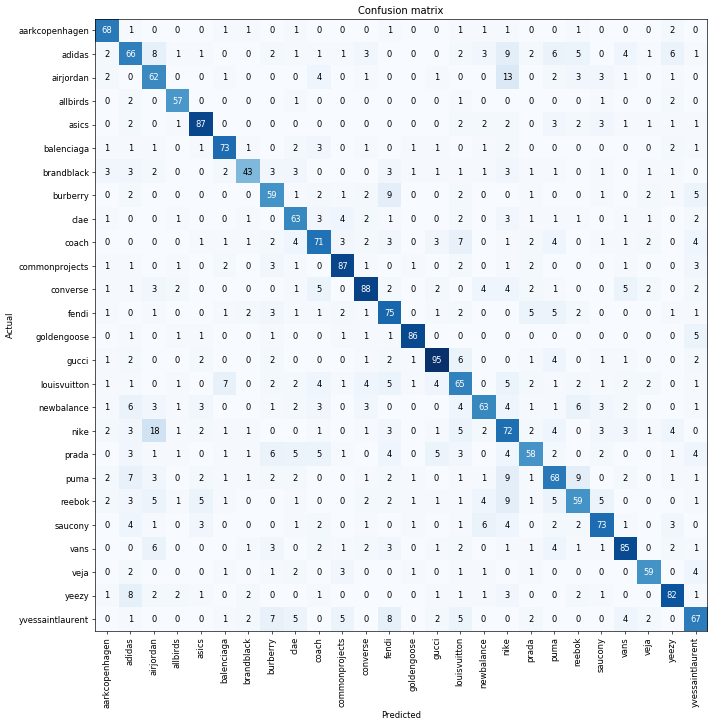

In [37]:
learn.load('stage-2')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [51]:
path = Path('lesson1/test_images')
img = open_image(path/'asics1.jpg')
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category asics

In [53]:
path = Path('lesson1/test_images')
img = open_image(path/'commonprojects1.jpg')
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category commonprojects

In [58]:
learn.export()

In [56]:
os.getcwd()

'/home/ubuntu/fastai'

In [57]:
learn.path

PosixPath('lesson1/shoe_brand_images')